In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def make_aesthetic(hex_color_list=None, 
	with_gridlines=False, 
	bold_title=False, 
	save_transparent=False, 
	font_scale=2, 
	latex2arial = True
	):
    """Make Seaborn look clean and add space between title and plot"""
    
    # Note: To make some parts of title bold and others not bold, we have to use
    # latex rendering. This should work: 
    # plt.title(r'$\mathbf{bolded\ title}$' + '\n' + 'And a non-bold subtitle')

    
    sns.set(style='white', context='paper', font_scale=font_scale)
    if not hex_color_list:
		    # 2024-11-28: Reordered color list
        hex_color_list = [
            "#2C3531",  # Dark charcoal gray with green undertone
            "#D41876",  # Telemagenta
            "#00A896",  # Persian green
            "#826AED",  # Medium slate blue
            "#F45B69",  # Vibrant pinkish-red
            "#E3B505",  # Saffron
            "#89DAFF",  # Pale azure
            "#342E37",  # Dark grayish-purple
            "#7DCD85",  # Emerald
            "#F7B2AD",  # Melon
            "#D4B2D8",  # Pink lavender
            "#020887",  # Phthalo blue
            "#E87461",  # Medium-bright orange
            "#7E6551",  # Coyote
            "#F18805"   # Tangerine
        ]
    
    sns.set_palette(sns.color_palette(hex_color_list))

    # Update on 
    # 2024-11-29: I realized I can automatically 
    # clean variable names so i dont have to manually replace underscore
    
    # Enhanced typography settings
    plt.rcParams.update({
        # font settings
        'font.family': 'Arial',
        'font.weight': 'regular',
        'axes.labelsize': 11 * font_scale,
        'axes.titlesize': 14 * font_scale,
        'xtick.labelsize': 10 * font_scale,
        'ytick.labelsize': 10 * font_scale,
        'legend.fontsize': 10 * font_scale,
        
        # spines/grids
        'axes.spines.right': False,
        'axes.spines.top': False,
        'axes.spines.left': True,
        'axes.spines.bottom': True,
        'axes.linewidth': 0.8,  # Thinner spines
        'axes.grid': with_gridlines,
        'grid.alpha': 0.2,       
        'grid.linestyle': ':', 
        'grid.linewidth': 0.5,
        
        # title
        'axes.titlelocation': 'left',
        'axes.titleweight': 'bold' if bold_title else 'regular',
        'axes.titlepad': 15 * (font_scale / 1),
        
        # fig
        'figure.facecolor': 'white',
        'axes.facecolor': 'white',
        'figure.constrained_layout.use': True,
        'figure.constrained_layout.h_pad': 0.2,
        'figure.constrained_layout.w_pad': 0.2,
        
        # legend
        'legend.frameon': True,
        'legend.framealpha': 0.95,
        'legend.facecolor': 'white',
        'legend.borderpad': 0.4,
        'legend.borderaxespad': 1.0,
        'legend.handlelength': 1.5,
        'legend.handleheight': 0.7,
        'legend.handletextpad': 0.5,
        
        # export
        'savefig.dpi': 300,
        'savefig.transparent': save_transparent,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.2,
        'figure.autolayout': False,
        
         # do this for the bold hack
        'mathtext.fontset': 'custom',
        'mathtext.rm': 'Arial',
        'mathtext.it': 'Arial:italic',
        'mathtext.bf': 'Arial:bold'

    })
    
    return hex_color_list

def clean_vars(s, how='title'):
    """
    Simple function to clean titles

    Params
    - s: The string to clean
    - how (default='title'): How to return string. Can be either ['title', 'lowercase', 'uppercase']

    Returns
    - cleaned string
    """
    assert how in ['title', 'lowercase', 'uppercase'], "Bad option!! see docs"
    s = re.sub('([a-z0-9])([A-Z])', r'\1 \2', s)
    s = s.replace('_', ' ')
    if how == 'title':
        return s.title()
    elif how=='lower':
        return s.lower()
    elif how=='upper':
    	return s.upper()



mypal = make_aesthetic()



In [5]:
df = pd.read_csv("../data/clean/mediacloud_analysis_2025-02-12__16:11:44.csv")
df

,phrase,total_mentions,controversy_mentions,controversy_ratio,success,is_dummy,mention_rank,controversy_rank,composite_score
0,abortion rights,66901,19870,0.297006,1,0,0.960938,0.859375,0.910156
1,border security,26164,8219,0.314134,1,0,0.875000,0.906250,0.890625
2,critical race theory,15844,5832,0.368089,1,0,0.828125,0.953125,0.890625
3,freedom of speech,15114,5094,0.337039,1,0,0.820312,0.929688,0.875000
4,gun control,30123,8751,0.290509,1,0,0.914062,0.820312,0.867188
...,...,...,...,...,...,...,...,...,...
123,plastic ban,72,6,0.083333,1,0,0.070312,0.132812,0.101562
124,bus schedule,107,4,0.037383,1,1,0.101562,0.054688,0.078125
125,train schedule,73,2,0.027397,1,1,0.078125,0.023438,0.050781
126,contractor oversight,11,0,0.000000,1,0,0.023438,0.011719,0.017578


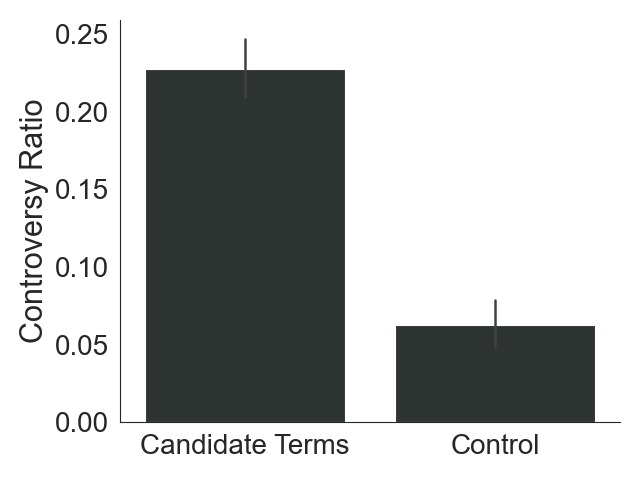

In [9]:
df = pd.read_csv("../data/clean/mediacloud_analysis_2025-02-12__16:11:44.csv")

df['control'] = df['is_dummy']
df['control'] = df['control'].replace({0: 'Candidate Terms', 1: 'Control'})

# Contro vs control plot
###############################
sns.barplot(data=df, x='control', y='controversy_ratio')
plt.ylabel("Controversy Ratio")
plt.xlabel("")
plt.show()



# Top and bottom plots 
###############################

def get_extremes(df, col, n):
    
    top = df.sort_values(by=[col], ascending=True).head(n)
    bottom = df.sort_values(by=[col], ascending=True).tail(n)
    both = pd.concat([top, bottom])
    both = both.sort_values(by=[col], ascending=False)
    both['mean'] = df[col].mean()
    return both

def plot_extremes(df, column, n, title=None):
    """
    Plot top and bottom n values for a given column with mean line

    """
    top = df.nlargest(n, column)
    bottom = df.nsmallest(n, column)
    both = pd.concat([top, bottom])
    both = both.sort_values(by=column, ascending=True)
    mean_val = df[column].mean()
    
    plt.figure(figsize=(10, 8))
    
    bars = plt.barh(range(len(both)), both[column])
    
    for i, bar in enumerate(bars):
        if i < n:  # Bottom n
            bar.set_color('#ff9999')  
        else:  # Top n
            bar.set_color('#66b3ff')  
    
    plt.axvline(x=mean_val, color='gray', linestyle='--', alpha=0.7)
    plt.text(mean_val, len(both), f'Mean: {mean_val:.3f}', 
             verticalalignment='bottom', horizontalalignment='right')
    
    plt.yticks(range(len(both)), both['phrase'])
    if title:
        plt.title(title)
    plt.xlabel(column)
    
    plt.grid(True, axis='x', alpha=0.3)
    
    plt.tight_layout()
    
    return plt




/var/folders/gc/36c2knv139jfg23x561mj5xr0000gp/T/ipykernel_48927/3035878632.py:59: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<module 'matplotlib.pyplot' from '/Users/jashkina/Documents/LocResearch/rename/.myvenv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

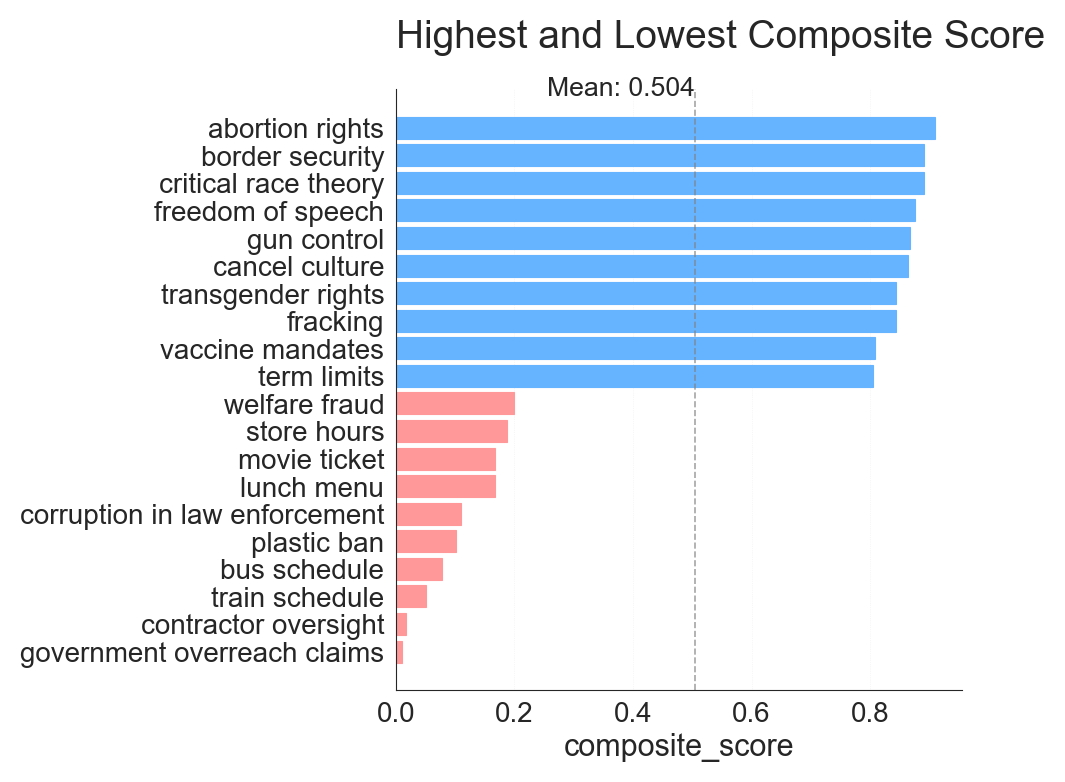

In [10]:
plot_extremes(df, 'composite_score', 10, 'Highest and Lowest Composite Score')


/var/folders/gc/36c2knv139jfg23x561mj5xr0000gp/T/ipykernel_48927/3035878632.py:59: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<module 'matplotlib.pyplot' from '/Users/jashkina/Documents/LocResearch/rename/.myvenv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

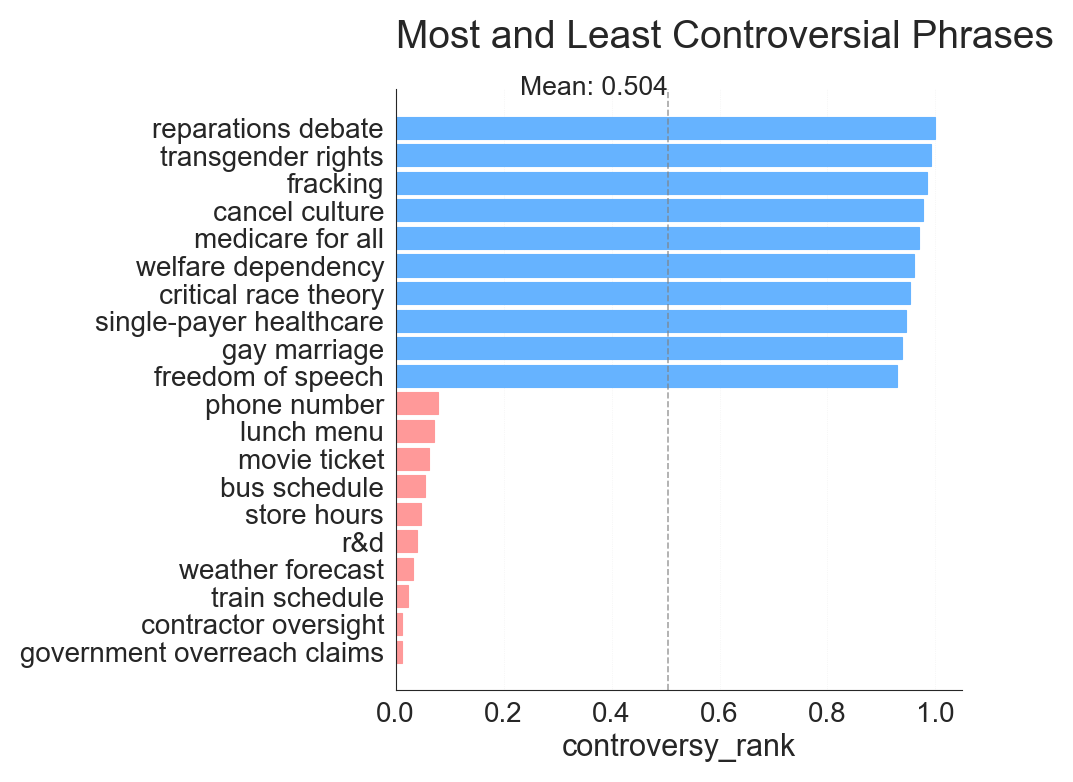

In [11]:


plot_extremes(df, 'controversy_rank', 10, 'Most and Least Controversial Phrases')



/var/folders/gc/36c2knv139jfg23x561mj5xr0000gp/T/ipykernel_48927/3035878632.py:59: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<module 'matplotlib.pyplot' from '/Users/jashkina/Documents/LocResearch/rename/.myvenv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

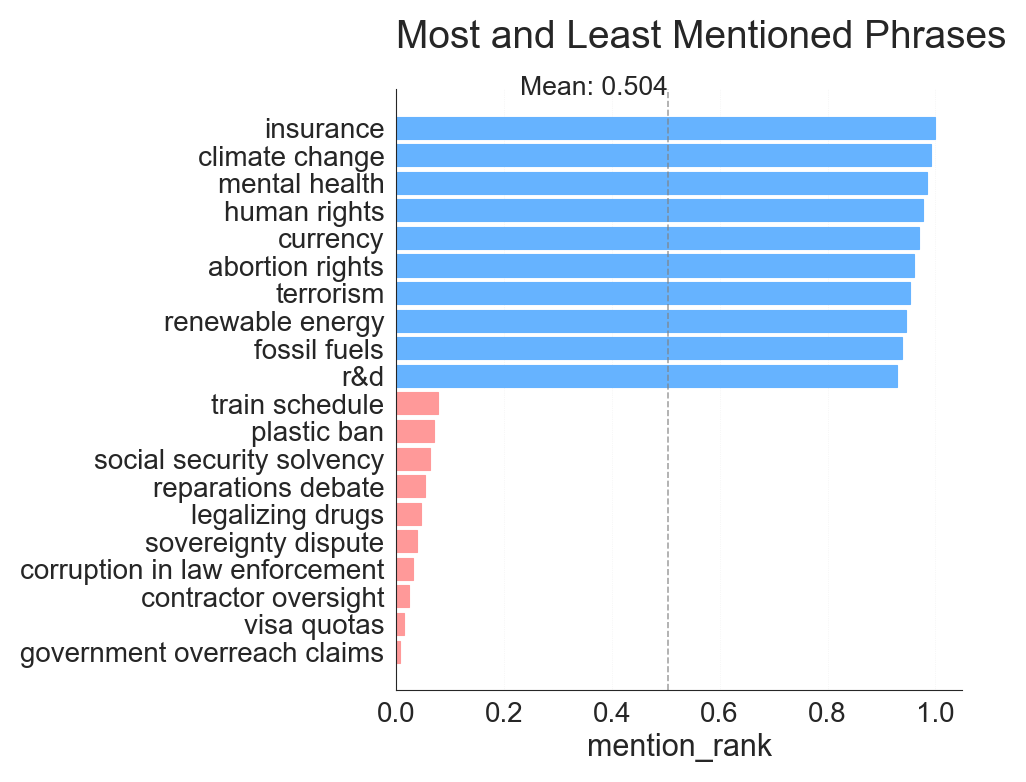

In [12]:
plot_extremes(df, 'mention_rank', 10, 'Most and Least Mentioned Phrases')

In [13]:
import dataframe_image as dfi

data = df.sort_values('composite_score', ascending=False)
data = data[['phrase', 'control', 'composite_score', 'mention_rank', 'controversy_rank']]

numeric_cols = ['composite_score', 'mention_rank', 'controversy_rank']
styled = data.style.background_gradient(subset=numeric_cols, cmap='Blues')\
    .format({col: '{:.3f}' for col in numeric_cols})

# Display
display(styled)



,phrase,control,composite_score,mention_rank,controversy_rank
0,abortion rights,Candidate Terms,0.910,0.961,0.859
2,critical race theory,Candidate Terms,0.891,0.828,0.953
1,border security,Candidate Terms,0.891,0.875,0.906
3,freedom of speech,Candidate Terms,0.875,0.820,0.930
4,gun control,Candidate Terms,0.867,0.914,0.820
5,cancel culture,Candidate Terms,0.863,0.750,0.977
6,transgender rights,Candidate Terms,0.844,0.695,0.992
7,fracking,Candidate Terms,0.844,0.703,0.984
8,vaccine mandates,Candidate Terms,0.809,0.727,0.891
9,term limits,Candidate Terms,0.805,0.734,0.875
